In [1]:
import sys
sys.version

'3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]'

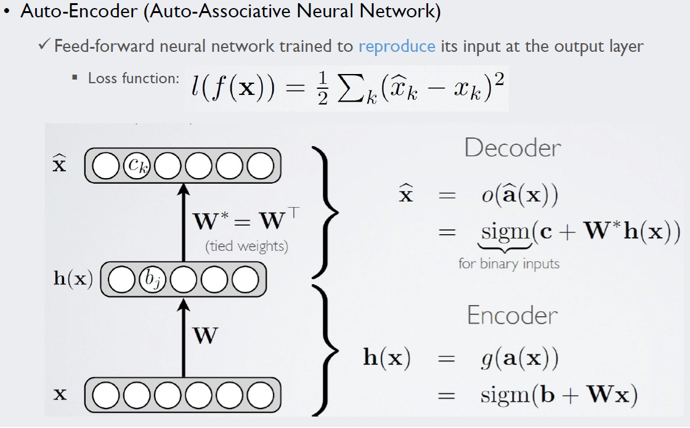

# The input and output layers have the same number of neurons.

Kinds of Autoencoders
1) Sparse autoencoder
2) Variational autoencoder
3) Denoising autoencoder

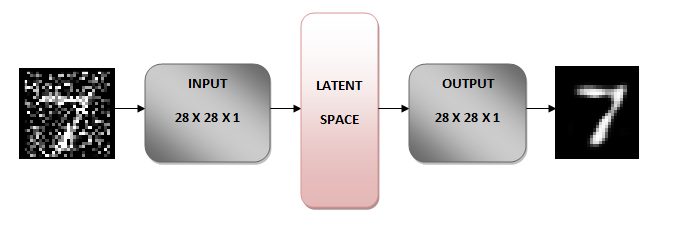

As we will see later, the original image is 28 x 28 x 1 image, and the transformed image is 7 x 7 x 32.
You can think of the 7 x 7 x 32 image as a 7 x 7 image with 32 color channels.

How does this magic happen?


# we define a loss (cost function) to minimize the difference between the reconstructed image and the original noise-free image.

In [2]:
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt

In [5]:
## Load the Data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The training and testing data loaded is stored in variables train_X and test_X respectively.

The data consists of handwritten numbers ranging from 0 to 9.

It has 55,000 train samples and 10,000 test samples. Each sample is a 28 X 28 Grayscale image.  (i.e. each 784-dimensional vector)

In [6]:
inputs_ = tf.placeholder(tf.float32,[None,28,28,1])
targets_ = tf.placeholder(tf.float32,[None,28,28,1])

In [7]:
## Using a ReLU as an Activation Function
def Irelu(x,alpha=0.1):
    return tf.maximum(alpha*x,x)

Why do we use a ReLU as an activation function?
(Answer) We want gradients to flow while we Backpropagate through the Network. 

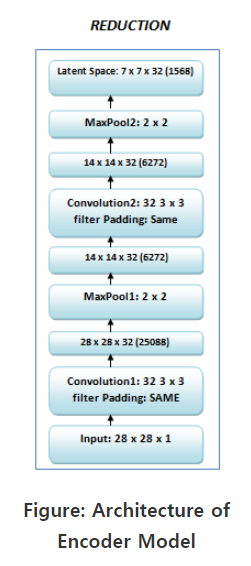

In [8]:
### Encoder
with tf.name_scope('en-convolutions'):
    conv1 = tf.layers.conv2d(inputs_,filters=32, kernel_size=(3,3), strides=(1,1),padding='SAME',use_bias=True,activation=Irelu,
                             name='conv1')
## Now 28X28X32
with tf.name_scope('en-pooling'):
    maxpool1 = tf.layers.max_pooling2d(conv1,pool_size=(2,2), strides=(2,2), name='pool1')
## Now 14x14x32
with tf.name_scope('en-convolutions'): 
    conv2 = tf.layers.conv2d(maxpool1,filters=32, kernel_size=(3,3), strides=(1,1), padding='SAME', use_bias=True, activation=Irelu,
                             name='conv2')
## Now 14x14x32
with tf.name_scope('encoding'):
    encoded = tf.layers.max_pooling2d(conv2,pool_size=(2,2), strides=(2,2), name='encoding')
## Now 7x7x32


# 7X7X32=1568, 즉 1568 차원 공간을 Bottleneck 혹은 latent space라고 부른다.

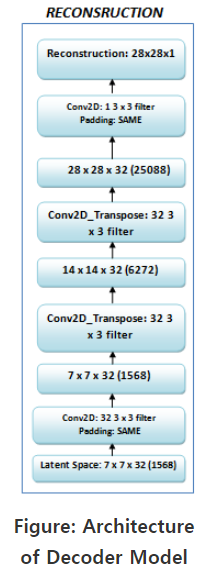

In [9]:
### Decoder
with tf.name_scope('decoder') :
    conv3 = tf.layers.conv2d(encoded, filters=32,kernel_size=(3,3), strides=(1,1), name='conv3',padding='SAME', use_bias=True,
                             activation=Irelu)
## Now 7x7x32
    upsample1 = tf.layers.conv2d_transpose(conv3,filters=32,kernel_size=3, padding='same',strides=2,name='upsample1')
## Now 14x14x32
    upsample2 = tf.layers.conv2d_transpose(upsample1,filters=32,kernel_size=3, padding='same',strides=2,name='upsample2')
## Now 28x28x32
    logits = tf.layers.conv2d(upsample2,filters=1, kernel_size=(3,3),strides=(1,1), name='logits',padding='SAME',use_bias=True)
## Now 28x28x1
# Pass logits through Sigmoid to get Reconsturcted image
    decoded = tf.sigmoid(logits, name='recon')

In [10]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
learning_rate = tf.placeholder(tf.float32)
cost = tf.reduce_mean(loss)  ##loss 즉, Cost function
opt= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) ##Optimizer

## Preprocessing the data
We apply following preprocessing to the data before feeding it to the network.

# 1. Convert each 784-dimensional vector into a matrix of size 28 X 28 X 1 which is feed into the network.
batch_train_x = mnist.train.next_batch(batch_size)
batch_test_x = mnist.test.next_batch(batch_size)
imgs_train = batch_x[0] .reshape((-1, 28, 28, 1))
imgs_test = batch_x[0] .reshape((-1, 28, 28, 1))
# 2. Add Noise to both Train and Test images which we then feed into the network.
    ※ Noise factor is a Hyperparameter
    ※ Noise_factor = 0.5
    X_test_noisy
        x_test_noisy = imgs_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs_test.shape)
        x_test_noisy = np.clip(x_test_noisy, 0., 1.)
       
    X_train_noisy        
        x_train_noisy = imgs + noise_factor * np.random.normal(loc=0.0,scale=1.0, size=imgs.shape)
        x_train_noisy = np.clip(x_train_noisy, 0., 1.)

# epoch : 전체 데이터에 대한 한 번의 학습 (Forward 와 Backward 포함)을 의미합니다.

# batch_size : 한 번에 처리하는 사진의 장 수를 의미합니다.

Epoch: 1/25... Training Loss: 0.6884 Validation Loss: 0.6883


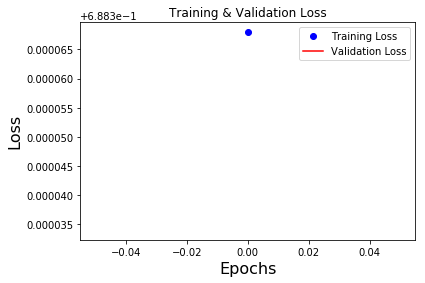

Epoch: 2/25... Training Loss: 0.6850 Validation Loss: 0.6850


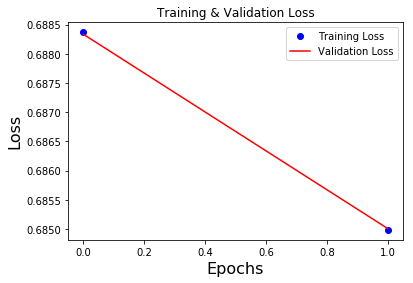

Epoch: 3/25... Training Loss: 0.6818 Validation Loss: 0.6818


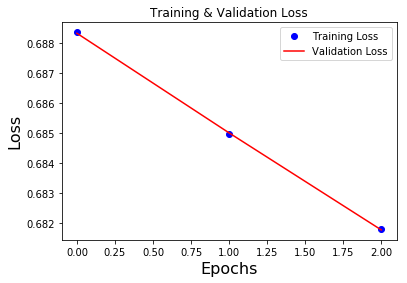

Epoch: 4/25... Training Loss: 0.6792 Validation Loss: 0.6792


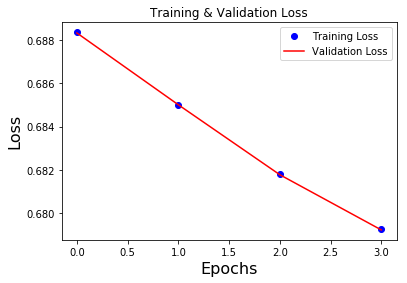

Epoch: 5/25... Training Loss: 0.6759 Validation Loss: 0.6759


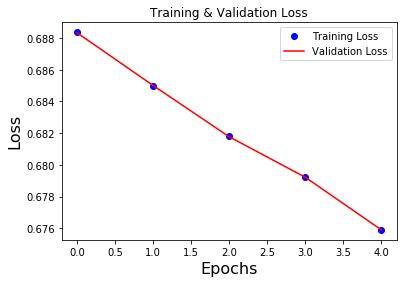

Epoch: 6/25... Training Loss: 0.6728 Validation Loss: 0.6728


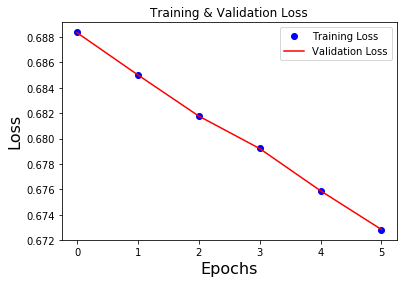

Epoch: 7/25... Training Loss: 0.6699 Validation Loss: 0.6699


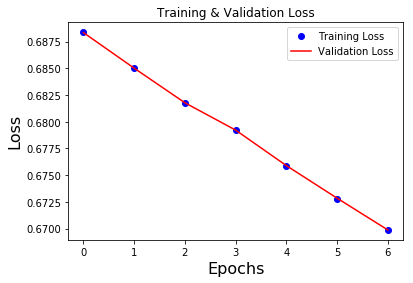

Epoch: 8/25... Training Loss: 0.6663 Validation Loss: 0.6663


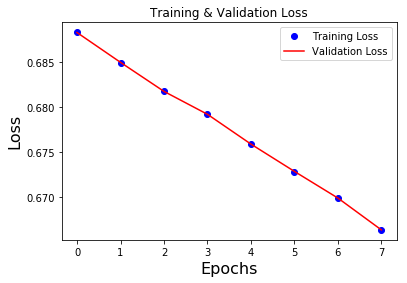

Epoch: 9/25... Training Loss: 0.6637 Validation Loss: 0.6637


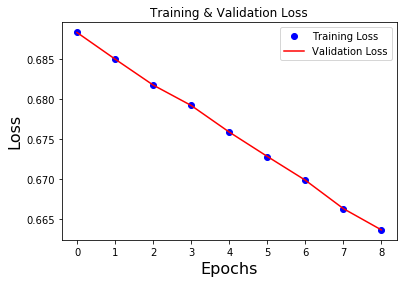

Epoch: 10/25... Training Loss: 0.6602 Validation Loss: 0.6602


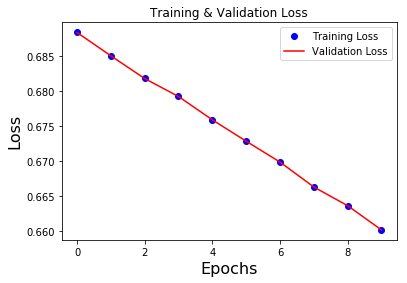

Epoch: 11/25... Training Loss: 0.6580 Validation Loss: 0.6580


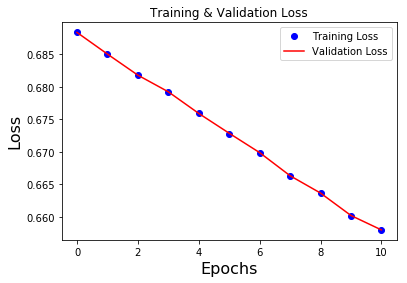

Epoch: 12/25... Training Loss: 0.6544 Validation Loss: 0.6544


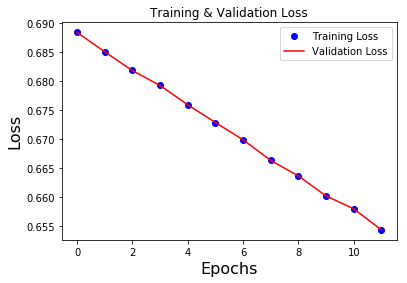

Epoch: 13/25... Training Loss: 0.6523 Validation Loss: 0.6523


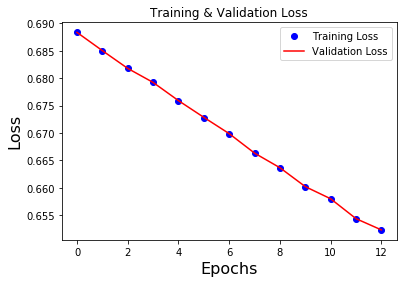

Epoch: 14/25... Training Loss: 0.6502 Validation Loss: 0.6502


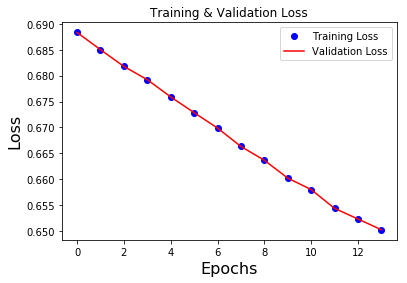

Epoch: 15/25... Training Loss: 0.6458 Validation Loss: 0.6457


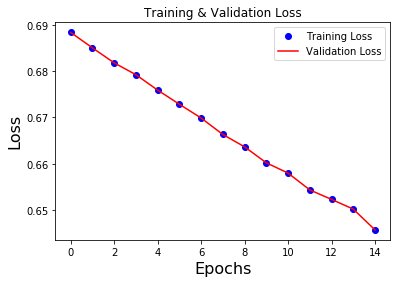

Epoch: 16/25... Training Loss: 0.6435 Validation Loss: 0.6435


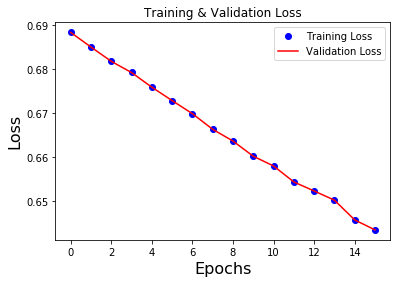

Epoch: 17/25... Training Loss: 0.6426 Validation Loss: 0.6426


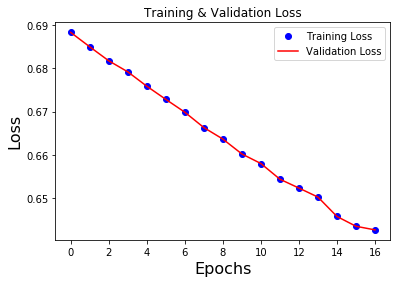

Epoch: 18/25... Training Loss: 0.6405 Validation Loss: 0.6405


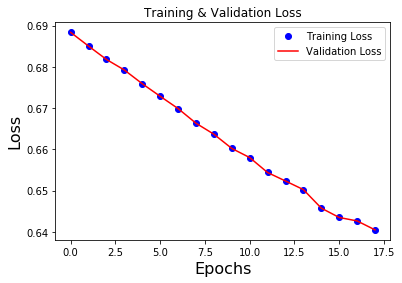

Epoch: 19/25... Training Loss: 0.6363 Validation Loss: 0.6363


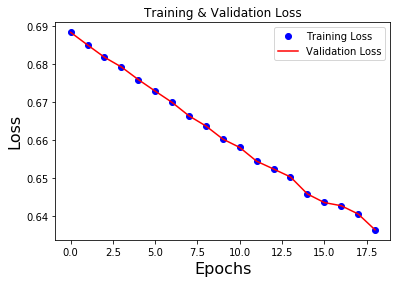

Epoch: 20/25... Training Loss: 0.6326 Validation Loss: 0.6326


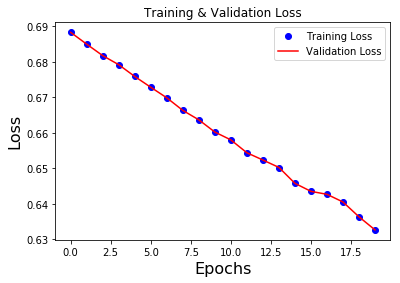

Epoch: 21/25... Training Loss: 0.6293 Validation Loss: 0.6293


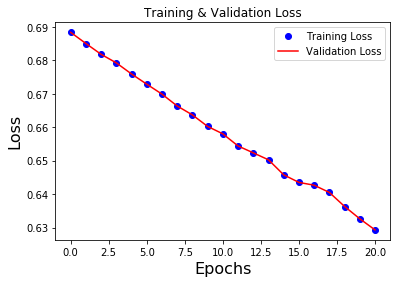

Epoch: 22/25... Training Loss: 0.6258 Validation Loss: 0.6258


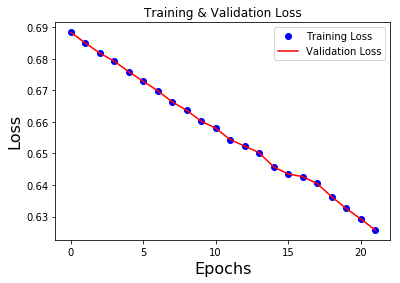

Epoch: 23/25... Training Loss: 0.6260 Validation Loss: 0.6260


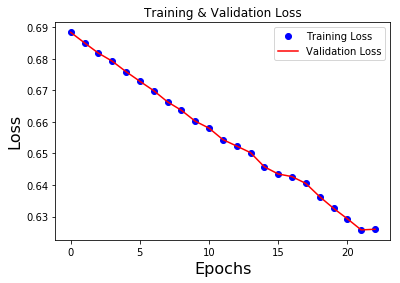

Epoch: 24/25... Training Loss: 0.6219 Validation Loss: 0.6219


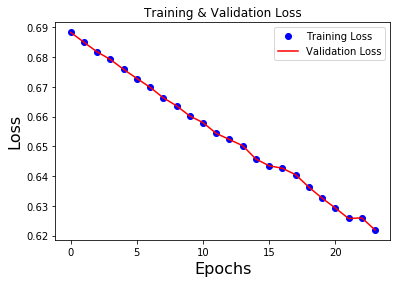

Epoch: 25/25... Training Loss: 0.6215 Validation Loss: 0.6215


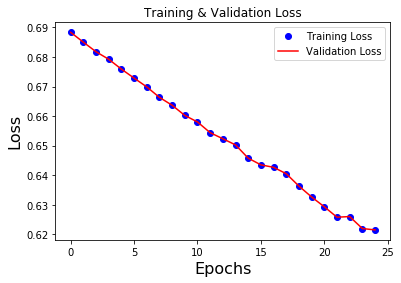

Original Images


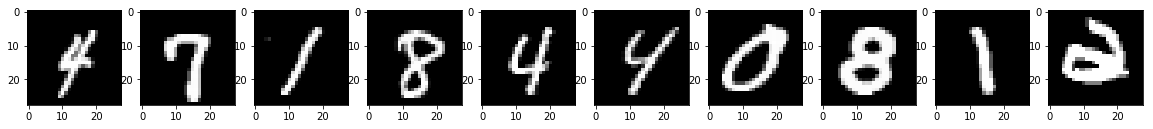

Noisy Images


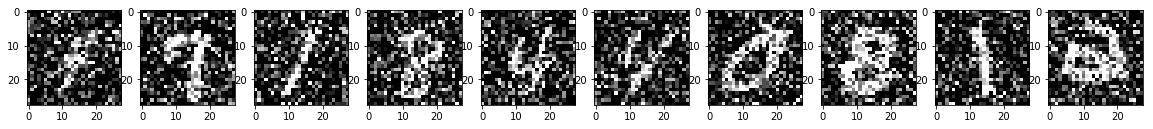

Reconstruction of Noisy Images


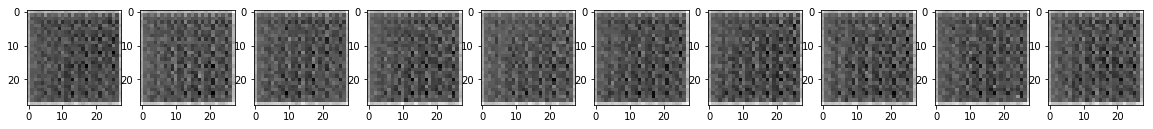

In [11]:
### Training
sess = tf.Session()

##tf.reset_default_graph()
saver = tf.train.Saver()
loss = []
valid_loss = []

## We specify the Number of epochs as 25 with Batch size of 64.
## This means that the whole Dataset will be feed to the network 25 times.

display_step = 1
epochs = 25
batch_size = 64

## Calculate : Ir=[1e-3/(2**(i//5) for i in range(epochs))]
Ir = 1e-5
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs', sess.graph)

# for e in range(epochs)
for e in range(epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
    for ibatch in range(total_batch):
        batch_x = mnist.train.next_batch(batch_size)
        batch_test_x = mnist.test.next_batch(batch_size)
        imgs_test = batch_x[0] .reshape((-1, 28, 28, 1))
        noise_factor = 0.5
    # X_test_noisy
        x_test_noisy = imgs_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs_test.shape)
        x_test_noisy = np.clip(x_test_noisy, 0., 1.)
        imgs = batch_x[0] .reshape((-1, 28, 28, 1))
    # X_train_noisy        
        x_train_noisy = imgs + noise_factor * np.random.normal(loc=0.0,scale=1.0, size=imgs.shape)
        x_train_noisy = np.clip(x_train_noisy, 0., 1.)
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: x_train_noisy,
                                                      targets_: imgs,learning_rate:Ir})
        batch_cost_test = sess.run(cost, feed_dict={inputs_: x_test_noisy,
                                                      targets_: imgs_test})
    if (e+1) % display_step == 0:
        print("Epoch: {}/{}...". format(e+1, epochs),
             "Training Loss: {:.4f}" .format(batch_cost),
             "Validation Loss: {:.4f}" .format(batch_cost_test))
        
    loss.append(batch_cost)
    valid_loss.append(batch_cost_test)
    plt.plot(range(e+1), loss, 'bo', label='Training Loss')
    plt.plot(range(e+1), valid_loss, 'r', label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.legend()
    plt.figure()
    plt.show()
    saver.save(sess, './encode_model')
    
batch_x = mnist.test.next_batch(10)
imgs = batch_x[0] .reshape((-1, 28, 28, 1))
noise_factor = 0.5
x_test_noisy = imgs + noise_factor* np.random.normal(loc=0.0,scale=1.0, size=imgs.shape)
x_test_noisy = np.clip(x_test_noisy, 0.,  1.)
    #Reconstruction
recon_img = sess.run([decoded], feed_dict={inputs_: x_test_noisy})[0]
plt.figure(figsize=(20, 4))
plt.title('Reconstructed Images')

###Print
print("Original Images")
for i in range(10):
    plt.subplot(2,  10, i+1)
    plt.imshow(imgs[i, ..., 0], cmap='gray')
plt.show()
plt.figure(figsize=(20, 4))
print("Noisy Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i, ..., 0], cmap='gray')
plt.show()
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(recon_img[i, ..., 0], cmap='gray')
plt.show()

writer.close()

sess.close()